# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [1]:
import os
import json
import pandas as pd

# ÏµúÏÉÅÏúÑ Í≤ΩÎ°ú ÏÑ§Ï†ï
root_dir = '../data/CAT_image_2nd'
json_count = 0


# ÌïòÏúÑ Ìè¥Îçî Í∞úÏàò ÏÑ∏Í∏∞
folder_count = sum(
    os.path.isdir(os.path.join(root_dir, name))
    for name in os.listdir(root_dir)
)

print(f"üìÅ Ìè¥Îçî Í∞úÏàò: {folder_count}Í∞ú")

for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)

    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.json'):
                json_count += 1

print(f"üì¶ JSON ÌååÏùº Í∞úÏàò: {json_count}Í∞ú")

üìÅ Ìè¥Îçî Í∞úÏàò: 14329Í∞ú
üì¶ JSON ÌååÏùº Í∞úÏàò: 14329Í∞ú


## Step01 : Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ Î∞è ÎùºÎ≤® Ï†ÑÏ≤òÎ¶¨

In [2]:
# Ï†ïÍ∑úÌôîÌï† ÎùºÎ≤® Îß§Ìïë Ï†ïÏùò : ÌÉúÏú§Îãò ÎùºÎ≤®ÎßÅ ÏûëÏóÖÍ≥º Align
action_label_map = {
    "Í±∑Í±∞ÎÇò ÎúÄ": "Í±∑Í±∞ÎÇò Îã¨Î¶¨Îäî ÎèôÏûë",
    "Í±∑Í±∞ÎÇò ÎúÄ ": "Í±∑Í±∞ÎÇò Îã¨Î¶¨Îäî ÎèôÏûë",
    "Í±∑Í±∞ÎÇò Îõ∞Îäî ÎèôÏûë": "Í±∑Í±∞ÎÇò Îã¨Î¶¨Îäî ÎèôÏûë",

    "Íº¨Î¶¨Î•º ÌùîÎì†Îã§": "Íº¨Î¶¨Î•º ÌùîÎìúÎäî ÎèôÏûë",
    "Íº¨Î¶¨Î•º ÌùîÎìúÎäî ÎèôÏûë": "Íº¨Î¶¨Î•º ÌùîÎìúÎäî ÎèôÏûë",

    "ÎÇ©Ïûë ÏóéÎìúÎ¶º": "ÎÇ©Ïûë ÏóéÎìúÎ¶¨Îäî ÎèôÏûë",
    "ÎÇ©Ïûë ÏóéÎìúÎ¶¨Îäî ÎèôÏûë": "ÎÇ©Ïûë ÏóéÎìúÎ¶¨Îäî ÎèôÏûë",

    "Î∞∞Î•º Î≥¥ÏûÑ": "Î∞∞Î•º Î≥¥Ïó¨Ï£ºÎäî ÎèôÏûë",
    "Î∞∞Î•º Î≥¥Ïù¥Îäî ÎèôÏûë": "Î∞∞Î•º Î≥¥Ïó¨Ï£ºÎäî ÎèôÏûë",
    "Î∞∞Î•º Î≥¥Ïó¨Ï£ºÎäî ÎèôÏûë": "Î∞∞Î•º Î≥¥Ïó¨Ï£ºÎäî ÎèôÏûë",

    "Í∑∏Î£®Î∞çÌï®": "Í∑∏Î£®Î∞çÌïòÎäî ÎèôÏûë",
    "Í∑∏Î£®Î∞çÌïòÎäî ÎèôÏûë": "Í∑∏Î£®Î∞çÌïòÎäî ÎèôÏûë",

    "Î®∏Î¶¨Î•º Îì§Ïù¥Îåê": "Î®∏Î¶¨Î•º Îì§Ïù¥ÎåÄÎäî ÎèôÏûë",
    "Î®∏Î¶¨Î•º Îì§Ïù¥ÎåÄÎäî ÎèôÏûë": "Î®∏Î¶¨Î•º Îì§Ïù¥ÎåÄÎäî ÎèôÏûë",

    "Î∞úÏùÑ Ïà®Í∏∞Í≥† ÏõÖÌÅ¨Î¶¨Í≥† ÏïâÏùå": "Î∞úÏùÑ Ïà®Í∏∞Í≥† ÏõÖÌÅ¨Î¶¨Í≥† ÏïâÎäî ÎèôÏûë",
    "Î∞úÏùÑ Ïà®Í∏∞Í≥† ÏõÖÌÅ¨Î¶¨Í≥† ÏïâÎäî ÎèôÏûë": "Î∞úÏùÑ Ïà®Í∏∞Í≥† ÏõÖÌÅ¨Î¶¨Í≥† ÏïâÎäî ÎèôÏûë",

    "ÏïûÎ∞úÎ°ú ÍæπÍæπ ÎàÑÎ¶Ñ": "ÏïûÎ∞úÎ°ú ÍæπÍæπ ÎàÑÎ•¥Îäî ÎèôÏûë",
    "ÏïûÎ∞úÎ°ú ÍæπÍæπ ÎàÑÎ•¥Îäî ÎèôÏûë": "ÏïûÎ∞úÎ°ú ÍæπÍæπ ÎàÑÎ•¥Îäî ÎèôÏûë",

    "ÏòÜÏúºÎ°ú ÎàÑÏõå ÏûàÏùå": "ÏòÜÏúºÎ°ú ÎàïÎäî ÎèôÏûë",
    "ÏòÜÏúºÎ°ú ÎàïÎäî ÎèôÏûë": "ÏòÜÏúºÎ°ú ÎàïÎäî ÎèôÏûë",

    "Ï¢åÏö∞Î°ú ÎíπÍµ¥Ïùå": "Ï¢åÏö∞Î°ú ÎíπÍµ¨Îäî ÎèôÏûë",
    "Ï¢åÏö∞Î°ú ÎíπÍµ¨Îäî ÎèôÏûë": "Ï¢åÏö∞Î°ú ÎíπÍµ¨Îäî ÎèôÏûë",

    "ÌåîÏùÑ ÎªóÏñ¥ ÌúòÏ†ÅÍ±∞Î¶º": "ÌåîÏùÑ ÎªóÏñ¥ ÌúòÏ†ÅÍ±∞Î¶¨Îäî ÎèôÏûë",
    "ÏïûÎ∞úÏùÑ ÎªóÏñ¥ ÌúòÏ†ÅÍ±∞Î¶¨Îäî ÎèôÏûë": "ÌåîÏùÑ ÎªóÏñ¥ ÌúòÏ†ÅÍ±∞Î¶¨Îäî ÎèôÏûë",

    "ÌóàÎ¶¨Î•º ÏïÑÏπòÎ°ú ÏÑ∏ÏõÄ": "ÌóàÎ¶¨Î•º ÏïÑÏπòÎ°ú ÏÑ∏Ïö∞Îäî ÎèôÏûë",
    "ÌóàÎ¶¨Î•º ÏïÑÏπòÎ°ú ÏÑ∏Ïö∞Îäî ÎèôÏûë": "ÌóàÎ¶¨Î•º ÏïÑÏπòÎ°ú ÏÑ∏Ïö∞Îäî ÎèôÏûë"
}

In [3]:
situation_label_map = {
    # Í∏∞ÌÉÄ
    "Í≥µÍ≤©ÏÑ±_Í∏∞ÌÉÄ": "Í∏∞ÌÉÄ",
    "Í≥µÌè¨_Í∏∞ÌÉÄ": "Í∏∞ÌÉÄ",
    "Î∂àÏïà/Ïä¨Ìîî_Í∏∞ÌÉÄ": "Í∏∞ÌÉÄ",
    "Ìé∏Ïïà/ÏïàÏ†ï_Í∏∞ÌÉÄ": "Í∏∞ÌÉÄ",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_Í∏∞ÌÉÄ": "Í∏∞ÌÉÄ",
    "ÌôîÎÇ®/Î∂àÏæå_Í∏∞ÌÉÄ": "Í∏∞ÌÉÄ",

    # ÎÇØÏÑ† ÏÜåÎ¶¨ Í¥ÄÎ†®
    "Í≥µÍ≤©ÏÑ±_Ï¥àÏù∏Ï¢Ö ÏÜåÎ¶¨Í∞Ä ÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "Í≥µÍ≤©ÏÑ±_ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "Í≥µÍ≤©ÏÑ±_ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇòÍ±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ Î¥§ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "Í≥µÌè¨_Ï¥àÏù∏Ï¢Ö ÏÜåÎ¶¨Í∞Ä ÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "Í≥µÌè¨_ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "Í≥µÌè¨_ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇòÍ±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ Î¥§ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "Î∂àÏïà/Ïä¨Ìîî_ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "Î∂àÏïà/Ïä¨Ìîî_ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇòÍ±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ Î¥§ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "Ìé∏Ïïà/ÏïàÏ†ï_ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "Ìé∏Ïïà/ÏïàÏ†ï_ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇòÍ±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ Î¥§ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_Ï¥àÏù∏Ï¢Ö ÏÜåÎ¶¨Í∞Ä ÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇòÍ±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ Î¥§ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "ÌôîÎÇ®/Î∂àÏæå_Ï¥àÏù∏Ï¢Ö ÏÜåÎ¶¨Í∞Ä ÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "ÌôîÎÇ®/Î∂àÏæå_ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",
    "ÌôîÎÇ®/Î∂àÏæå_ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇòÍ±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ Î¥§ÏùÑ Îïå": "ÎÇØÏÑ† ÏÜåÎ¶¨",

    # ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º/Ïû•ÏÜå Í¥ÄÎ†®
    "Í≥µÍ≤©ÏÑ±_ÎÇØÏÑ† ÎèÑÍµ¨Î•º ÏûêÏã†Ïùò Î™∏Ïóê ÏÇ¨Ïö©Ìï† Îïå(ÎØ∏Ïö©ÎèÑÍµ¨ Îì±)": "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",
    "Í≥µÍ≤©ÏÑ±_ÎπóÏßà/Î∞úÌÜ±ÍπçÍ∏∞/Î™©Ïöï Îì± ÏúÑÏÉùÍ¥ÄÎ¶¨Î•º Ìï† Îïå": "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",
    "Í≥µÌè¨_ÎÇØÏÑ† ÎèÑÍµ¨Î•º ÏûêÏã†Ïùò Î™∏Ïóê ÏÇ¨Ïö©Ìï† Îïå(ÎØ∏Ïö©ÎèÑÍµ¨)": "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",
    "Í≥µÌè¨_ÎπóÏßà/Î∞úÌÜ±ÍπçÍ∏∞/Î™©Ïöï Îì± ÏúÑÏÉùÍ¥ÄÎ¶¨Î•º Ìï† Îïå": "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",
    "Î∂àÏïà/Ïä¨Ìîî_ÎπóÏßà/Î∞úÌÜ±ÍπçÍ∏∞/Î™©Ïöï Îì± ÏúÑÏÉùÍ¥ÄÎ¶¨Î•º Ìï† Îïå": "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",
    "Ìé∏Ïïà/ÏïàÏ†ï_ÎÇØÏÑ† ÎèÑÍµ¨Î•º ÏûêÏã†Ïùò Î™∏Ïóê ÏÇ¨Ïö©Ìï† Îïå(ÎØ∏Ïö©ÎèÑÍµ¨ Îì±)": "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",
    "Ìé∏Ïïà/ÏïàÏ†ï_ÎπóÏßà/Î∞úÌÜ±ÍπçÍ∏∞/Î™©Ïöï Îì± ÏúÑÏÉùÍ¥ÄÎ¶¨Î•º Ìï† Îïå": "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_ÎπóÏßà/Î∞úÌÜ±ÍπçÍ∏∞/Î™©Ïöï Îì± ÏúÑÏÉùÍ¥ÄÎ¶¨Î•º Ìï† Îïå": "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",
    "ÌôîÎÇ®/Î∂àÏæå_ÎπóÏßà/Î∞úÌÜ±ÍπçÍ∏∞/Î™©Ïöï Îì± ÏúÑÏÉùÍ¥ÄÎ¶¨Î•º Ìï† Îïå": "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",
    "Î™©ÏöïÌï† Îïå": "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",
    "Î™©ÏöïÌïòÍ±∞ÎÇò Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑÎ•º ÎßåÏßà Îïå" : "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",
    
    "Í≥µÍ≤©ÏÑ±_ÎÇØÏÑ† ÎèôÎ¨º ÎòêÎäî ÏÇ¨ÎûåÏùÑ ÎßåÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "Í≥µÍ≤©ÏÑ±_Îã§Î•∏ ÎèôÎ¨ºÏùÑ Î≥¥Í±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ ÎßåÎÇ† Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "Í≥µÍ≤©ÏÑ±_Îã§Î•∏ ÎèôÎ¨ºÏùÑ Î≥¥Í±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ ÎßåÎÇ† Îïå ÏÇ∞Ï±Ö ÎÇòÏôîÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "Í≥µÌè¨_Îã§Î•∏ ÏÇ¨ÎûåÏù¥ÎÇò ÎèôÎ¨ºÏùÑ ÎßåÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "Í≥µÌè¨_ÎÇØÏÑ† ÎèôÎ¨º ÎòêÎäî ÏÇ¨ÎûåÏùÑ ÎßåÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "Î∂àÏïà/Ïä¨Ìîî_Îã§Î•∏ ÎèôÎ¨ºÏùÑ Î≥¥Í±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ ÎßåÎÇ† Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "Î∂àÏïà/Ïä¨Ìîî_Îã§Î•∏ ÏÇ¨ÎûåÏù¥ÎÇò ÎèôÎ¨ºÏùÑ ÎßåÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "Ìé∏Ïïà/ÏïàÏ†ï_Îã§Î•∏ ÎèôÎ¨ºÏùÑ Î≥¥Í±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ ÎßåÎÇ† Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "Ìé∏Ïïà/ÏïàÏ†ï_Îã§Î•∏ ÎèôÎ¨ºÏùÑ Î≥¥Í±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ ÎßåÎÇ† Îïå ÏÇ∞Ï±Ö ÎÇòÏôîÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "Ìé∏Ïïà/ÏïàÏ†ï_Îã§Î•∏ ÏÇ¨ÎûåÏù¥ÎÇò ÎèôÎ¨ºÏùÑ ÎßåÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_Îã§Î•∏ ÎèôÎ¨ºÏùÑ Î≥¥Í±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ ÎßåÎÇ† Îïå ÏÇ∞Ï±Ö ÎÇòÏôîÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_Îã§Î•∏ ÏÇ¨ÎûåÏù¥ÎÇò ÎèôÎ¨ºÏùÑ ÎßåÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "ÌôîÎÇ®/Î∂àÏæå_ÎÇØÏÑ† ÎèôÎ¨º ÎòêÎäî ÏÇ¨ÎûåÏùÑ ÎßåÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "ÌôîÎÇ®/Î∂àÏæå_Îã§Î•∏ ÎèôÎ¨ºÏùÑ Î≥¥Í±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ ÎßåÎÇ† Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "ÌôîÎÇ®/Î∂àÏæå_Îã§Î•∏ ÎèôÎ¨ºÏùÑ Î≥¥Í±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ ÎßåÎÇ† Îïå ÏÇ∞Ï±Ö ÎÇòÏôîÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    "ÌôîÎÇ®/Î∂àÏæå_Îã§Î•∏ ÏÇ¨ÎûåÏù¥ÎÇò ÎèôÎ¨ºÏùÑ ÎßåÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",

    "Í≥µÍ≤©ÏÑ±_ÎÇØÏÑ† Ïû•ÏÜåÏóê ÏûàÍ±∞ÎÇò ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇ† Îïå": "ÎÇØÏÑ† Ïû•ÏÜå",
    "Í≥µÌè¨_ÎÇØÏÑ† Ïû•ÏÜåÏóê ÏûàÍ±∞ÎÇò ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇ† Îïå": "ÎÇØÏÑ† Ïû•ÏÜå",
    "Î∂àÏïà/Ïä¨Ìîî_ÎÇØÏÑ† Ïû•ÏÜåÏóê ÏûàÍ±∞ÎÇò ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇ† Îïå": "ÎÇØÏÑ† Ïû•ÏÜå",
    "Ìé∏Ïïà/ÏïàÏ†ï_ÎÇØÏÑ† Ïû•ÏÜåÏóê ÏûàÍ±∞ÎÇò ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇ† Îïå": "ÎÇØÏÑ† Ïû•ÏÜå",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_ÎÇØÏÑ† Ïû•ÏÜåÏóê ÏûàÍ±∞ÎÇò ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇ† Îïå": "ÎÇØÏÑ† Ïû•ÏÜå",
    "ÌôîÎÇ®/Î∂àÏæå_ÎÇØÏÑ† Ïû•ÏÜåÏóê ÏûàÍ±∞ÎÇò ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇ† Îïå": "ÎÇØÏÑ† Ïû•ÏÜå",

    # ÏÇ∞Ï±Ö Í¥ÄÎ†®
    "Í≥µÍ≤©ÏÑ±_ÏÇ∞Ï±ÖÏù¥ÎÇò ÎÖ∏Ï¶àÏõåÌÅ¨ Ï§ë": "ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ",
    "Î∂àÏïà/Ïä¨Ìîî_ÏÇ∞Ï±Ö Ï§ÄÎπÑ ÎòêÎäî ÏÇ∞Ï±ÖÏ§ëÏùº Îïå": "ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ",
    "Î∂àÏïà/Ïä¨Ìîî_ÏÇ∞Ï±ÖÏù¥ÎÇò ÎÖ∏Ï¶àÏõåÌÅ¨ Ï§ë": "ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ",
    "Ìé∏Ïïà/ÏïàÏ†ï_ÏÇ∞Ï±Ö Ï§ÄÎπÑ ÎòêÎäî ÏÇ∞Ï±ÖÏ§ëÏùº Îïå": "ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ",
    "Ìé∏Ïïà/ÏïàÏ†ï_ÏÇ∞Ï±ÖÏù¥ÎÇò ÎÖ∏Ï¶àÏõåÌÅ¨ Ï§ë": "ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_ÏÇ∞Ï±Ö Ï§ÄÎπÑ ÎòêÎäî ÏÇ∞Ï±ÖÏ§ëÏùº Îïå": "ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_ÏÇ∞Ï±ÖÏù¥ÎÇò ÎÖ∏Ï¶àÏõåÌÅ¨ Ï§ë": "ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ",
    "ÌôîÎÇ®/Î∂àÏæå_ÏÇ∞Ï±Ö Ï§ÄÎπÑ ÎòêÎäî ÏÇ∞Ï±ÖÏ§ëÏùº Îïå": "ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ",
    "ÌôîÎÇ®/Î∂àÏæå_ÏÇ∞Ï±ÖÏù¥ÎÇò ÎÖ∏Ï¶àÏõåÌÅ¨ Ï§ë": "ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ",

    # Î®πÏùÑ Í≤É/Ïû•ÎÇúÍ∞ê Í¥ÄÎ†® (Ï∂îÍ∞Ä)
    "Í≥µÍ≤©ÏÑ±_Î®πÏùÑÍ≤É, Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå": "Î®πÏùÑ Í≤É/Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå",
    "Í≥µÌè¨_Î®πÏùÑÍ≤É, Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå": "Î®πÏùÑ Í≤É/Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå",
    "Î∂àÏïà/Ïä¨Ìîî_Î®πÏùÑÍ≤É, Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå": "Î®πÏùÑ Í≤É/Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå",
    "Ìé∏Ïïà/ÏïàÏ†ï_Î®πÏùÑÍ≤É, Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå": "Î®πÏùÑ Í≤É/Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_Î®πÏùÑÍ≤É, Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå": "Î®πÏùÑ Í≤É/Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå",
    "ÌôîÎÇ®/Î∂àÏæå_Î®πÏùÑÍ≤É, Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå": "Î®πÏùÑ Í≤É/Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå",

    # Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑ Ï†ëÏ¥â (Ï∂îÍ∞Ä)
    "Í≥µÍ≤©ÏÑ±_Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑÎ•º ÎßåÏßà Îïå": "Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑ Ï†ëÏ¥â",
    "Î∂àÏïà/Ïä¨Ìîî_Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑÎ•º ÎßåÏßà Îïå": "Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑ Ï†ëÏ¥â",
    "Ìé∏Ïïà/ÏïàÏ†ï_Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑÎ•º ÎßåÏßà Îïå": "Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑ Ï†ëÏ¥â",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑÎ•º ÎßåÏßà Îïå": "Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑ Ï†ëÏ¥â",
    "ÌôîÎÇ®/Î∂àÏæå_Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑÎ•º ÎßåÏßà Îïå": "Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑ Ï†ëÏ¥â",

    # Î≥¥Ìò∏Ïûê Í¥ÄÎ†®
    "Í≥µÍ≤©ÏÑ±_Î≥¥Ìò∏ÏûêÍ∞Ä ÏßëÏóê ÎèåÏïÑÏôîÏùÑ Îïå": "Î≥¥Ìò∏Ïûê ÎèåÏïÑÏò¥",
    "Í≥µÌè¨_Î≥¥Ìò∏ÏûêÍ∞Ä ÏßëÏóê ÎèåÏïÑÏôîÏùÑ Îïå": "Î≥¥Ìò∏Ïûê ÎèåÏïÑÏò¥",
    "Î∂àÏïà/Ïä¨Ìîî_Î≥¥Ìò∏ÏûêÍ∞Ä ÏßëÏóê ÎèåÏïÑÏôîÏùÑ Îïå": "Î≥¥Ìò∏Ïûê ÎèåÏïÑÏò¥",
    "Ìé∏Ïïà/ÏïàÏ†ï_Î≥¥Ìò∏ÏûêÍ∞Ä ÏßëÏóê ÎèåÏïÑÏôîÏùÑ Îïå": "Î≥¥Ìò∏Ïûê ÎèåÏïÑÏò¥",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_Î≥¥Ìò∏ÏûêÍ∞Ä ÏßëÏóê ÎèåÏïÑÏôîÏùÑ Îïå": "Î≥¥Ìò∏Ïûê ÎèåÏïÑÏò¥",
    "ÌôîÎÇ®/Î∂àÏæå_Î≥¥Ìò∏ÏûêÍ∞Ä ÏßëÏóê ÎèåÏïÑÏôîÏùÑ Îïå": "Î≥¥Ìò∏Ïûê ÎèåÏïÑÏò¥",

    "Í≥µÍ≤©ÏÑ±_Î≥¥Ìò∏ÏûêÏóêÍ≤å ÌòºÎÇ¨ÏùÑ Îïå": "Î≥¥Ìò∏ÏûêÏóêÍ≤å ÌòºÎÇ®",
    "Î∂àÏïà/Ïä¨Ìîî_Î≥¥Ìò∏ÏûêÏóêÍ≤å ÌòºÎÇ¨ÏùÑ Îïå": "Î≥¥Ìò∏ÏûêÏóêÍ≤å ÌòºÎÇ®",
    "Ìé∏Ïïà/ÏïàÏ†ï_Î≥¥Ìò∏ÏûêÏóêÍ≤å ÌòºÎÇ¨ÏùÑ Îïå": "Î≥¥Ìò∏ÏûêÏóêÍ≤å ÌòºÎÇ®",
    "ÌôîÎÇ®/Î∂àÏæå_Î≥¥Ìò∏ÏûêÏóêÍ≤å ÌòºÎÇ¨ÏùÑ Îïå": "Î≥¥Ìò∏ÏûêÏóêÍ≤å ÌòºÎÇ®",
    "ÌòºÎÇ† Îïå" : "Î≥¥Ìò∏ÏûêÏóêÍ≤å ÌòºÎÇ®",

    "Î∂àÏïà/Ïä¨Ìîî_Î≥¥Ìò∏ÏûêÏôÄ Îñ®Ïñ¥ÏßÄÍ±∞ÎÇò ÌòºÏûê ÎÇ®Í≤®Ï°åÏùÑ Îïå": "Î≥¥Ìò∏ÏûêÏôÄ Î∂ÑÎ¶¨",
    "Ìé∏Ïïà/ÏïàÏ†ï_Î≥¥Ìò∏ÏûêÏôÄ Îñ®Ïñ¥ÏßÄÍ±∞ÎÇò ÌòºÏûê ÎÇ®Í≤®Ï°åÏùÑ Îïå": "Î≥¥Ìò∏ÏûêÏôÄ Î∂ÑÎ¶¨",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_Î≥¥Ìò∏ÏûêÏôÄ Îñ®Ïñ¥Ïßà Îïå/ÌòºÏûê ÎÇ®Í≤®ÏßÄÍ±∞ÎÇò ÎÇØÏÑ†Ïû•ÏÜåÏóê ÏûàÏùÑ Îïå": "Î≥¥Ìò∏ÏûêÏôÄ Î∂ÑÎ¶¨",
    "ÌôîÎÇ®/Î∂àÏæå_Î≥¥Ìò∏ÏûêÏôÄ Îñ®Ïñ¥Ïßà Îïå/ÌòºÏûê ÎÇ®Í≤®ÏßÄÍ±∞ÎÇò ÎÇØÏÑ†Ïû•ÏÜåÏóê ÏûàÏùÑ Îïå": "Î≥¥Ìò∏ÏûêÏôÄ Î∂ÑÎ¶¨",

    # Ìé∏ÏïàÌïú Ï†ëÏ¥â
    "Í≥µÍ≤©ÏÑ±_Ìé∏ÏïàÌûà Ïì∞Îã§Îì¨Ïñ¥ Ï§Ñ Îïå": "Ìé∏ÏïàÌïú Ï†ëÏ¥â",
    "Î∂àÏïà/Ïä¨Ìîî_Ìé∏ÏïàÌûà Ïì∞Îã§Îì¨Ïñ¥ Ï§Ñ Îïå": "Ìé∏ÏïàÌïú Ï†ëÏ¥â",
    "Ìé∏Ïïà/ÏïàÏ†ï_Ìé∏ÏïàÌûà Ïì∞Îã§Îì¨Ïñ¥ Ï§Ñ Îïå": "Ìé∏ÏïàÌïú Ï†ëÏ¥â",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_Ìé∏ÏïàÌûà Ïì∞Îã§Îì¨Ïñ¥ Ï§Ñ Îïå": "Ìé∏ÏïàÌïú Ï†ëÏ¥â",
    "ÌôîÎÇ®/Î∂àÏæå_Ìé∏ÏïàÌûà Ïì∞Îã§Îì¨Ïñ¥ Ï§Ñ Îïå": "Ìé∏ÏïàÌïú Ï†ëÏ¥â",

    # Ïû†Îì§Í∏∞ Ï†Ñ/Í∞ôÏù¥ ÎàÑÏõÄ
    "Í≥µÍ≤©ÏÑ±_Ïû†Îì§Í∏∞ Ï†ÑÏù¥ÎÇò Í∞ôÏù¥ ÎàÑÏõåÏûàÏùÑ Îïå": "Ïû†Îì§Í∏∞ Ï†Ñ/Í∞ôÏù¥ ÎàÑÏõÄ",
    "Î∂àÏïà/Ïä¨Ìîî_Ïû†Îì§Í∏∞ Ï†ÑÏù¥ÎÇò Í∞ôÏù¥ ÎàÑÏõåÏûàÏùÑ Îïå": "Ïû†Îì§Í∏∞ Ï†Ñ/Í∞ôÏù¥ ÎàÑÏõÄ",
    "Ìé∏Ïïà/ÏïàÏ†ï_Ïû†Îì§Í∏∞ Ï†ÑÏù¥ÎÇò Í∞ôÏù¥ ÎàÑÏõåÏûàÏùÑ Îïå": "Ïû†Îì§Í∏∞ Ï†Ñ/Í∞ôÏù¥ ÎàÑÏõÄ",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_Ïû†Îì§Í∏∞ Ï†ÑÏù¥ÎÇò Í∞ôÏù¥ ÎàÑÏõåÏûàÏùÑ Îïå": "Ïû†Îì§Í∏∞ Ï†Ñ/Í∞ôÏù¥ ÎàÑÏõÄ",
    "ÌôîÎÇ®/Î∂àÏæå_Ïû†Îì§Í∏∞ Ï†ÑÏù¥ÎÇò Í∞ôÏù¥ ÎàÑÏõåÏûàÏùÑ Îïå": "Ïû†Îì§Í∏∞ Ï†Ñ/Í∞ôÏù¥ ÎàÑÏõÄ",

    # Ìú¥Ïãù/ÏûêÍ∏∞ Í≥µÍ∞Ñ
    "Í≥µÍ≤©ÏÑ±_Ìú¥ÏãùÏãúÍ∞Ñ, ÏûêÏã†ÎßåÏùò Í≥µÍ∞ÑÏóê Îì§Ïñ¥Í∞îÏùÑ Îïå(Ï∫îÎÑ¨, ÏÜåÌåå Ïπ®ÎåÄ Î∞ë Îì±)": "Ìú¥Ïãù/ÏûêÍ∏∞ Í≥µÍ∞Ñ",
    "Î∂àÏïà/Ïä¨Ìîî_Ìú¥ÏãùÏãúÍ∞Ñ, ÏûêÏã†ÎßåÏùò Í≥µÍ∞ÑÏóê Îì§Ïñ¥Í∞îÏùÑ Îïå(Ï∫îÎÑ¨, ÏÜåÌåå Ïπ®ÎåÄ Î∞ë Îì±)": "Ìú¥Ïãù/ÏûêÍ∏∞ Í≥µÍ∞Ñ",
    "Ìé∏Ïïà/ÏïàÏ†ï_Ìú¥ÏãùÏãúÍ∞Ñ, ÏûêÏã†ÎßåÏùò Í≥µÍ∞ÑÏóê Îì§Ïñ¥Í∞îÏùÑ Îïå(Ï∫îÎÑ¨, ÏÜåÌåå Ïπ®ÎåÄ Î∞ë Îì±)": "Ìú¥Ïãù/ÏûêÍ∏∞ Í≥µÍ∞Ñ",
    "ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ_Ìú¥ÏãùÏãúÍ∞Ñ, ÏûêÏã†ÎßåÏùò Í≥µÍ∞ÑÏóê Îì§Ïñ¥Í∞îÏùÑ Îïå(Ï∫îÎÑ¨, ÏÜåÌåå Ïπ®ÎåÄ Î∞ë Îì±)": "Ìú¥Ïãù/ÏûêÍ∏∞ Í≥µÍ∞Ñ",
    "ÌôîÎÇ®/Î∂àÏæå_Ìú¥ÏãùÏãúÍ∞Ñ, ÏûêÏã†ÎßåÏùò Í≥µÍ∞ÑÏóê Îì§Ïñ¥Í∞îÏùÑ Îïå(Ï∫îÎÑ¨, ÏÜåÌåå Ïπ®ÎåÄ Î∞ë Îì±)": "Ìú¥Ïãù/ÏûêÍ∏∞ Í≥µÍ∞Ñ",
        # Í∏∞ÌÉÄ

    # ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º/Ïû•ÏÜå Í¥ÄÎ†®
    "ÎÇØÏÑ† ÎèôÎ¨º ÎòêÎäî ÏÇ¨ÎûåÏùÑ ÎßåÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    
    # ÏÇ∞Ï±Ö Í¥ÄÎ†®
    "Îã§Î•∏ ÎèôÎ¨ºÏùÑ Î≥¥Í±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ ÎßåÎÇ† Îïå ÏÇ∞Ï±Ö ÎÇòÏôîÏùÑ Îïå": "ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ",
    "ÏÇ∞Ï±Ö ÎÇòÏôîÏùÑ Îïå": "ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ",
    
    "Î™©ÏöïÌïòÍ±∞ÎÇò Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑÎ•º ÎßåÏßà Îïå" : "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",
    "Î™©ÏöïÌï† Îïå" : "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",


    # Î®πÏùÑ Í≤É/Ïû•ÎÇúÍ∞ê Í¥ÄÎ†® (Ï∂îÍ∞Ä)


    # Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑ Ï†ëÏ¥â (Ï∂îÍ∞Ä)
    "ÎÇØÏÑ† ÎèÑÍµ¨Î•º ÏûêÏã†Ïùò Î™∏Ïóê ÏÇ¨Ïö©Ìï† Îïå(ÎØ∏Ïö©ÎèÑÍµ¨ Îì±)": "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",


    # Î≥¥Ìò∏Ïûê Í¥ÄÎ†®
    "Î≥¥Ìò∏ÏûêÏôÄ Îñ®Ïñ¥Ïßà Îïå/ÌòºÏûê ÎÇ®Í≤®ÏßÄÍ±∞ÎÇò ÎÇØÏÑ†Ïû•ÏÜåÏóê ÏûàÏùÑ Îïå": "Î≥¥Ìò∏ÏûêÏôÄ Î∂ÑÎ¶¨",
    
    "ÌòºÎÇ† Îïå" : "Î≥¥Ìò∏ÏûêÏóêÍ≤å ÌòºÎÇ®"
}


In [4]:
import os
import json
import csv

json_root = "../data/CAT_image_2nd/"
output_csv = "../data/summary_normalized.csv"

header = ["video_name", "frames", "action", "emotion", "situation"]

with open(output_csv, "w", newline='', encoding='utf-8') as f_out:
    writer = csv.writer(f_out)
    writer.writerow(header)

    # json_root ÏïÑÎûò Î™®Îì† Ìè¥Îçî Î¶¨Ïä§Ìä∏
    folder_list = [f for f in os.listdir(json_root) if os.path.isdir(os.path.join(json_root, f))]

    for i, folder_name in enumerate(folder_list, 1):
        folder_path = os.path.join(json_root, folder_name)

        json_files = [f for f in os.listdir(folder_path) if f.endswith(".json")]

        if len(json_files) == 0:
            print(f"Warning: No JSON file found in folder {folder_name}")
            continue

        json_path = os.path.join(folder_path, json_files[0])

        with open(json_path, 'r', encoding='utf-8') as f_json:
            data = json.load(f_json)

            # video_nameÏóê Ìè¥Îçî Ï†ÑÏ≤¥ Í≤ΩÎ°ú (ÏÉÅÎåÄÍ≤ΩÎ°ú) ÎÑ£Í∏∞
            video_name = folder_path    # <- Ïó¨Í∏∞ ÏàòÏ†ï

            frames_count = len([img for img in os.listdir(folder_path) if img.endswith(".jpg")])

            raw_action = data.get("metadata", {}).get("action", "") or data.get("metadata", {}).get("inspect", {}).get("action", "")
            raw_emotion = data.get("metadata", {}).get("inspect", {}).get("emotion", "")
            raw_situation = data.get("metadata", {}).get("owner", {}).get("situation", "")

            action = action_label_map.get(raw_action, raw_action)
            combined_key = f"{raw_emotion}_{raw_situation}"
            situation = situation_label_map.get(combined_key, raw_situation)

            writer.writerow([video_name, frames_count, action, raw_emotion, situation])

    print("Done!")

Done!


Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [5]:
# Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú ÌôïÏù∏Ïö©ÎèÑÎ°ú Ìï®Ïàò Ï†ïÏùòÌï®
def print_label_distribution(df):
    label_columns = ['action', 'emotion', 'situation']
    for col in label_columns:
        print(f"üîπ {col} Î∂ÑÌè¨:")
        print(df[col].value_counts())
        print()
        
        unique_labels = sorted(df[col].unique())
        print(f"üîπ {col} ÎùºÎ≤® ÏÖã ({len(unique_labels)}Í∞ú):")
        for label in unique_labels:
            print(f"  - {label}")
        print("\n")
        
situation_label_map = {
    # Í∏∞ÌÉÄ

    # ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º/Ïû•ÏÜå Í¥ÄÎ†®
    "ÎÇØÏÑ† ÎèôÎ¨º ÎòêÎäî ÏÇ¨ÎûåÏùÑ ÎßåÎÇ¨ÏùÑ Îïå": "ÎÇØÏÑ† ÏÇ¨Îûå/ÎèôÎ¨º",
    
    # ÏÇ∞Ï±Ö Í¥ÄÎ†®
    "Îã§Î•∏ ÎèôÎ¨ºÏùÑ Î≥¥Í±∞ÎÇò ÎÇØÏÑ† ÏÇ¨ÎûåÏùÑ ÎßåÎÇ† Îïå ÏÇ∞Ï±Ö ÎÇòÏôîÏùÑ Îïå": "ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ",
    "ÏÇ∞Ï±Ö ÎÇòÏôîÏùÑ Îïå": "ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ",
    
    "Î™©ÏöïÌïòÍ±∞ÎÇò Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑÎ•º ÎßåÏßà Îïå" : "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",
    "Î™©ÏöïÌï† Îïå" : "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",


    # Î®πÏùÑ Í≤É/Ïû•ÎÇúÍ∞ê Í¥ÄÎ†® (Ï∂îÍ∞Ä)


    # Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑ Ï†ëÏ¥â (Ï∂îÍ∞Ä)
    "ÎÇØÏÑ† ÎèÑÍµ¨Î•º ÏûêÏã†Ïùò Î™∏Ïóê ÏÇ¨Ïö©Ìï† Îïå(ÎØ∏Ïö©ÎèÑÍµ¨ Îì±)": "ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨",


    # Î≥¥Ìò∏Ïûê Í¥ÄÎ†®
    "Î≥¥Ìò∏ÏûêÏôÄ Îñ®Ïñ¥Ïßà Îïå/ÌòºÏûê ÎÇ®Í≤®ÏßÄÍ±∞ÎÇò ÎÇØÏÑ†Ïû•ÏÜåÏóê ÏûàÏùÑ Îïå": "Î≥¥Ìò∏ÏûêÏôÄ Î∂ÑÎ¶¨",
    
    "ÌòºÎÇ† Îïå" : "Î≥¥Ìò∏ÏûêÏóêÍ≤å ÌòºÎÇ®"
}


In [6]:
# df = pd.read_csv("../data/summary_normalized.csv")

# df['action'] = df['action'].apply(lambda x: action_label_map.get(x.strip(), x.strip()) if isinstance(x, str) else x)
# df['situation'] = df['situation'].apply(lambda x: situation_label_map.get(x.strip(), x.strip()) if isinstance(x, str) else x)

# print_label_distribution(df)

### Step02 : ÌîÑÎ†àÏûÑ Ïàò Í≥†Î†§Ìï¥ÏÑú train/val/test dataset Setting

In [7]:
# df['frames'].describe()

In [8]:
# df_filtered = df[(df['frames'] >= 25) & (df['frames'] <= 150)]
# df_filtered['frames'].describe()

In [9]:
# print_label_distribution(df_filtered)

In [10]:
# df_filtered.to_csv("df_filtered.csv", index=False)

situationÍ≥º emotionÏ°∞Ìï©ÏúºÎ°ú train/valÎ°ú ÎÇòÎàåÎ†§Í≥† ÌñàÏúºÎÇò ÏÉòÌîåÏàòÍ∞Ä Ï†ÅÏñ¥ÏÑú pass

In [11]:
# # stratify Í∏∞Ï§Ä Ïª¨Îüº ÏÉùÏÑ±
# df['stratify_col'] = df['situation'] + "_" + df['emotion']


In [12]:
# ÏÇ∞Ï±Ö Ï§ë/ÏÇ∞Ï±Ö Ï§ÄÎπÑ_ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ                                1
# Ïû†Îì§Í∏∞ Ï†ÑÏù¥ÎÇò Í∞ôÏù¥ ÎàÑÏõåÏûàÏùÑ Îïå_Í≥µÍ≤©ÏÑ±                            1
# ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨_ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ                                   1
# ÏÇ∞Ï±ÖÏù¥ÎÇò ÎÖ∏Ï¶àÏõåÌÅ¨ Ï§ë_Í≥µÍ≤©ÏÑ±                                  1
# ÎÇØÏÑ† ÏÜåÎ¶¨Í∞Ä ÎÇ¨ÏùÑ Îïå_ÌôîÎÇ®/Î∂àÏæå                                1

In [13]:
# combo_counts =df['stratify_col'].value_counts()
# combo_counts
# valid_combos = combo_counts[combo_counts >= 2].index
# df_valid = df[df['stratify_col'].isin(valid_combos)]

In [14]:
# print_label_distribution(df_valid)
# df_valid

In [16]:
df = pd.read_csv("../data/setting_1st.csv")

combo_counts =df['stratify_col'].value_counts()
combo_counts
valid_combos = combo_counts[combo_counts >= 2].index
df_valid = df[df['stratify_col'].isin(valid_combos)]

In [21]:
print_label_distribution(df)

üîπ action Î∂ÑÌè¨:
action
Í∑∏Î£®Î∞çÌïòÎäî ÎèôÏûë             4349
Íº¨Î¶¨Î•º ÌùîÎìúÎäî ÎèôÏûë           2133
Í±∑Í±∞ÎÇò Îã¨Î¶¨Îäî ÎèôÏûë           1492
Î∞úÏùÑ Ïà®Í∏∞Í≥† ÏõÖÌÅ¨Î¶¨Í≥† ÏïâÎäî ÎèôÏûë    1292
ÏòÜÏúºÎ°ú ÎàïÎäî ÎèôÏûë            1188
ÌåîÏùÑ ÎªóÏñ¥ ÌúòÏ†ÅÍ±∞Î¶¨Îäî ÎèôÏûë        823
Î®∏Î¶¨Î•º Îì§Ïù¥ÎåÄÎäî ÎèôÏûë           737
Î∞∞Î•º Î≥¥Ïó¨Ï£ºÎäî ÎèôÏûë            709
ÏïûÎ∞úÎ°ú ÍæπÍæπ ÎàÑÎ•¥Îäî ÎèôÏûë         671
Ï¢åÏö∞Î°ú ÎíπÍµ¨Îäî ÎèôÏûë            566
ÎÇ©Ïûë ÏóéÎìúÎ¶¨Îäî ÎèôÏûë            319
ÌóàÎ¶¨Î•º ÏïÑÏπòÎ°ú ÏÑ∏Ïö∞Îäî ÎèôÏûë         50
Name: count, dtype: int64

üîπ action ÎùºÎ≤® ÏÖã (12Í∞ú):
  - Í±∑Í±∞ÎÇò Îã¨Î¶¨Îäî ÎèôÏûë
  - Í∑∏Î£®Î∞çÌïòÎäî ÎèôÏûë
  - Íº¨Î¶¨Î•º ÌùîÎìúÎäî ÎèôÏûë
  - ÎÇ©Ïûë ÏóéÎìúÎ¶¨Îäî ÎèôÏûë
  - Î®∏Î¶¨Î•º Îì§Ïù¥ÎåÄÎäî ÎèôÏûë
  - Î∞úÏùÑ Ïà®Í∏∞Í≥† ÏõÖÌÅ¨Î¶¨Í≥† ÏïâÎäî ÎèôÏûë
  - Î∞∞Î•º Î≥¥Ïó¨Ï£ºÎäî ÎèôÏûë
  - ÏïûÎ∞úÎ°ú ÍæπÍæπ ÎàÑÎ•¥Îäî ÎèôÏûë
  - ÏòÜÏúºÎ°ú ÎàïÎäî ÎèôÏûë
  - Ï¢åÏö∞Î°ú ÎíπÍµ¨Îäî ÎèôÏûë
  - ÌåîÏùÑ ÎªóÏñ¥ ÌúòÏ†ÅÍ±∞Î¶¨Îäî ÎèôÏûë
  - ÌóàÎ¶¨Î•º Ï

In [22]:
# stratified split
from sklearn.model_selection import train_test_split
# stratified split
train_val, test = train_test_split(
    df_valid, test_size=0.2, random_state=42,
    stratify=df_valid['stratify_col']
)

train, val = train_test_split(
    train_val,
    test_size=0.25,  # 0.25 * 0.8 = 0.2
    random_state=42,
    stratify=train_val['stratify_col']
)


In [23]:
# ÎòêÎäî Í∞úÎ≥Ñ labelÎ≥Ñ Î∂ÑÌè¨ÎèÑ ÌôïÏù∏ Í∞ÄÎä•
print("\n[Train] situation:\n", train['stratify_col'].value_counts(normalize=True))
print("[Train] emotion:\n", train['stratify_col'].value_counts(normalize=True))


[Train] situation:
 stratify_col
Ìú¥Ïãù/ÏûêÍ∏∞ Í≥µÍ∞Ñ_Ìé∏Ïïà/ÏïàÏ†ï              0.241010
Í∏∞ÌÉÄ_Ìé∏Ïïà/ÏïàÏ†ï                    0.211451
Ïû†Îì§Í∏∞ Ï†Ñ/Í∞ôÏù¥ ÎàÑÏõÄ_Ìé∏Ïïà/ÏïàÏ†ï           0.151984
Î®πÏùÑ Í≤É/Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå_ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ    0.083673
Ìé∏ÏïàÌïú Ï†ëÏ¥â_Ìé∏Ïïà/ÏïàÏ†ï                0.062958
                              ...   
Ïã´Ïñ¥ÌïòÎäî Î∂ÄÏúÑ Ï†ëÏ¥â_ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ           0.000233
Ìé∏ÏïàÌïú Ï†ëÏ¥â_Í≥µÍ≤©ÏÑ±                  0.000233
Î®πÏùÑ Í≤É/Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå_Í≥µÌè¨        0.000233
ÎÇØÏÑ† Ïû•ÏÜå_ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ                0.000233
ÎØ∏Ïö©/ÏúÑÏÉùÍ¥ÄÎ¶¨_ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ              0.000233
Name: proportion, Length: 69, dtype: float64
[Train] emotion:
 stratify_col
Ìú¥Ïãù/ÏûêÍ∏∞ Í≥µÍ∞Ñ_Ìé∏Ïïà/ÏïàÏ†ï              0.241010
Í∏∞ÌÉÄ_Ìé∏Ïïà/ÏïàÏ†ï                    0.211451
Ïû†Îì§Í∏∞ Ï†Ñ/Í∞ôÏù¥ ÎàÑÏõÄ_Ìé∏Ïïà/ÏïàÏ†ï           0.151984
Î®πÏùÑ Í≤É/Ïû•ÎÇúÍ∞êÏù¥ ÏïûÏóê ÏûàÏùÑ Îïå_ÌñâÎ≥µ/Ï¶êÍ±∞ÏõÄ    0.083673
Ìé∏ÏïàÌïú Ï†ëÏ¥â_Ìé∏Ïïà/Ïïà

In [24]:
print(f"Train: {len(train['frames'])} | Val: {len(val['frames'])} | Test: {len(test['frames'])}")

Train: 8593 | Val: 2865 | Test: 2865


/tmp/ipykernel_1495506/2025028682.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


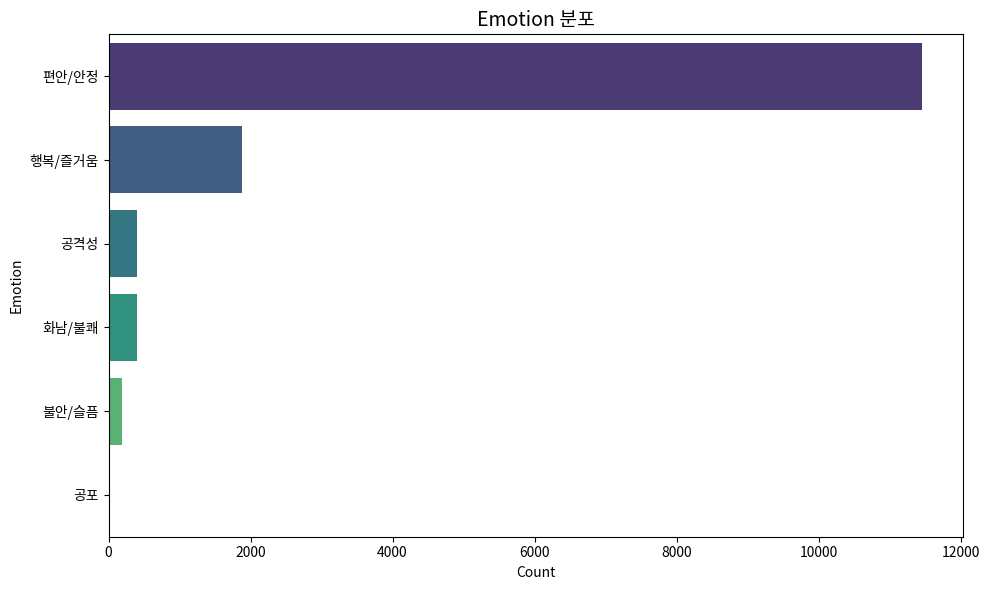

/tmp/ipykernel_1495506/2025028682.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


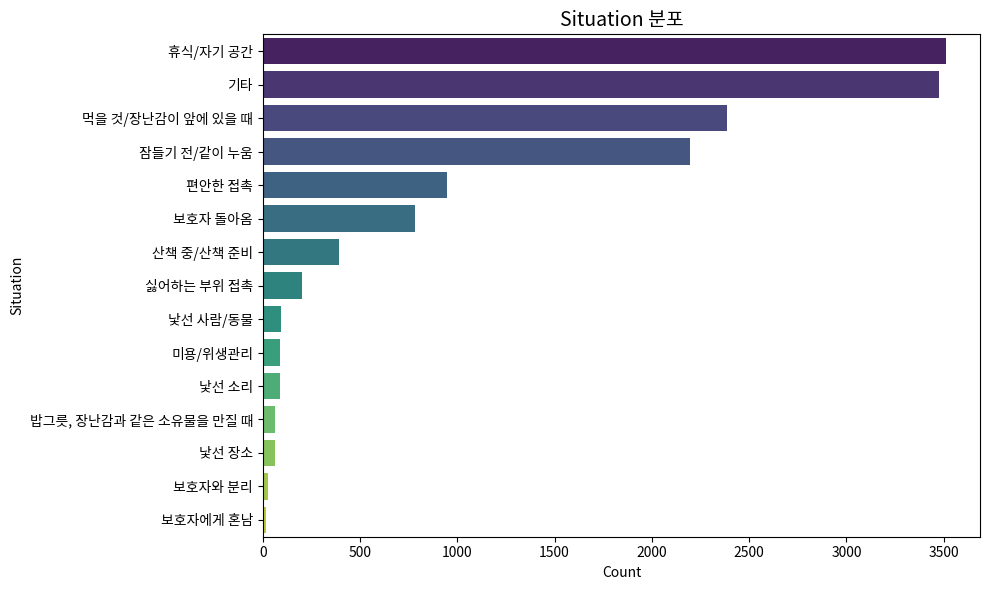

/tmp/ipykernel_1495506/2025028682.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


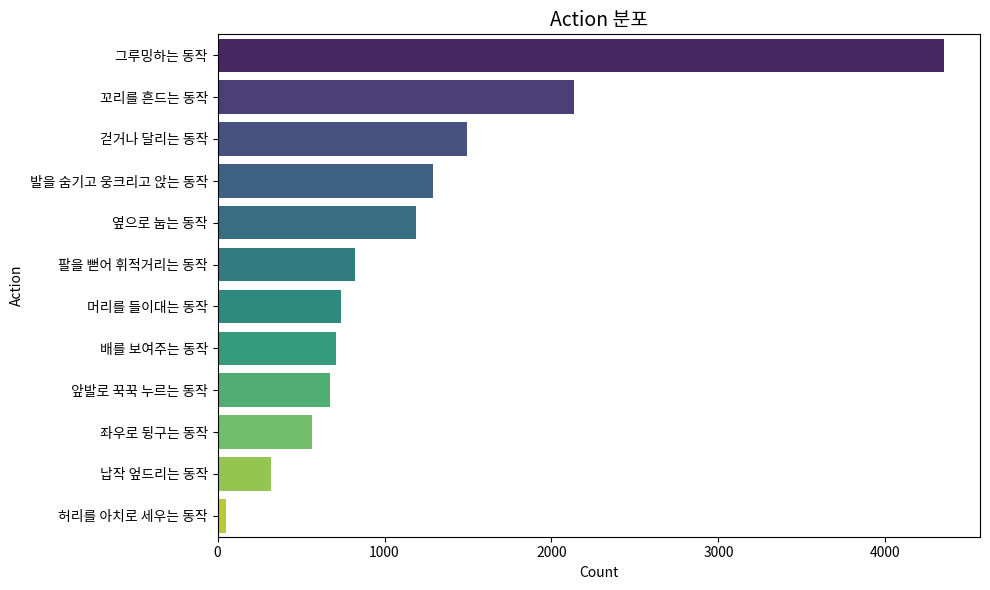

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns
import warnings

# matplotlib findfont Í≤ΩÍ≥† ÎÅÑÍ∏∞
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", message="findfont: Font family .* not found")
# matplotlib ÎÇ¥Î∂Ä Î°úÍπÖ Î†àÎ≤®ÏùÑ WARNING Ïù¥ÏÉÅÏúºÎ°ú Ïò¨Î¶¨Í∏∞


# NotoSansCJK Ìè∞Ìä∏ Í≤ΩÎ°ú ÏßÄÏ†ï
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False
# ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
matplotlib.rcParams['axes.unicode_minus'] = False

# ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_label_distribution(df, column_name, top_n=None):
    plt.figure(figsize=(10, 6))
    value_counts = df[column_name].value_counts()

    if top_n:
        value_counts = value_counts[:top_n]

    sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")
    plt.title(f"{column_name.capitalize()} Î∂ÑÌè¨", fontsize=14)
    plt.xlabel("Count")
    plt.ylabel(column_name.capitalize())
    plt.tight_layout()
    plt.show()

# Í∞ÅÍ∞Å ÎùºÎ≤® Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plot_label_distribution(df, 'emotion')
plot_label_distribution(df, 'situation')
plot_label_distribution(df, 'action')


In [ ]:
def plot_label_distribution_by_frames(df, column_name, top_n=None):
    plt.figure(figsize=(10, 6))
    
    # ÎùºÎ≤®Î≥Ñ ÌîÑÎ†àÏûÑ Ïàò Ï¥ùÌï© Í≥ÑÏÇ∞
    label_frame_counts = df.groupby(column_name)['frames'].sum().sort_values(ascending=False)

    if top_n:
        label_frame_counts = label_frame_counts[:top_n]

    sns.barplot(x=label_frame_counts.values, y=label_frame_counts.index, palette="viridis")
    plt.title(f"{column_name} (ÌîÑÎ†àÏûÑ Í∏∞Ï§Ä) Î∂ÑÌè¨", fontsize=14)
    plt.xlabel("Ï¥ù ÌîÑÎ†àÏûÑ Ïàò")
    plt.ylabel(column_name)
    plt.tight_layout()
    plt.show()

# ÌîÑÎ†àÏûÑ Í∏∞Ï§Ä Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plot_label_distribution_by_frames(df, 'emotion')
plot_label_distribution_by_frames(df, 'situation')
plot_label_distribution_by_frames(df, 'action')

In [25]:
train = train.drop(columns=['stratify_col'])
val = val.drop(columns=['stratify_col'])
test = test.drop(columns=['stratify_col'])

In [ ]:
# train, val, test
# train.to_csv("../data/train_fin.csv", index=False)
# val.to_csv("../data/val_fin.csv", index=False)
# test.to_csv("../data/test_fin.csv", index=False)

### step03 : ÏÉòÌîåÎßÅ Ï†ÑÎû¥

In [ ]:
df_valid.head()

In [ ]:
# # stratify Í∏∞Ï§Ä Ïª¨Îüº ÏÉùÏÑ±
# df_valid['stratify_col'] = df_valid['situation'] + "_" + df_valid['emotion']

# combo_counts =df_valid['stratify_col'].value_counts()
# # combo_counts

In [ ]:
import pandas as pd

def show(col,df):
    # 1) Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Ïàò ÌôïÏù∏
    class_counts = df[col].value_counts()
    print(class_counts)

    # 2) Ïñ∏ÎçîÏÉòÌîåÎßÅ Í∏∞Ï§Ä: ÏÜåÏàò ÌÅ¥ÎûòÏä§ ÏÉòÌîå ÏàòÎ°ú ÎßûÏ∂îÍ∏∞ (ÏµúÏÜå ÏÉòÌîå Ïàò)
    min_count = class_counts.min()
    print(f"Ïñ∏ÎçîÏÉòÌîåÎßÅ Í∏∞Ï§Ä ÏÉòÌîå Ïàò: {min_count}\n")

    # 3) ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú ÏÉòÌîåÏùÑ ÎûúÎç§ÌïòÍ≤å min_count ÎßåÌÅº Ï∂îÏ∂úÌï¥ÏÑú Ìï©ÏπòÍ∏∞
    df_under = pd.concat([
        df[df[col] == cls].sample(min_count, random_state=42)
        for cls in class_counts.index
    ])

    # 4) Í≤∞Í≥º ÌôïÏù∏
    print(df_under[col].value_counts())

In [ ]:
col = 'stratify_col'
show(col,df_valid)

In [ ]:
import pandas as pd

def under_sampling_with_threshold(df, stratify_col, threshold=10, multiplier=3, random_state=42):
    class_counts = df[stratify_col].value_counts()
    
    # Í∏∞Ï§Ä Ïù¥ÏÉÅÏù∏ ÌÅ¥ÎûòÏä§Îßå ÏÑ†ÌÉù
    valid_classes = class_counts[class_counts >= threshold].index.tolist()
    print(f"Í∏∞Ï§Ä Ïù¥ÏÉÅ ÌÅ¥ÎûòÏä§ Ïàò: {len(valid_classes)} / Ï†ÑÏ≤¥ ÌÅ¥ÎûòÏä§ Ïàò: {len(class_counts)}")
    
    target_count = threshold * multiplier
    print(f"ÏÉòÌîåÎßÅ Î™©Ìëú Ïàò: {target_count}")
    
    sampled_df_list = []
    for cls in valid_classes:
        cls_df = df[df[stratify_col] == cls]
        n_samples = min(len(cls_df), target_count)
        sampled = cls_df.sample(n_samples, random_state=random_state)
        sampled_df_list.append(sampled)
    
    # Í∏∞Ï§Ä ÎØ∏Îßå ÌÅ¥ÎûòÏä§Îäî ÏõêÎ≥∏ Í∑∏ÎåÄÎ°ú Ìè¨Ìï®Ìï†ÏßÄ ÏÑ†ÌÉù (Ïó¨Í∏∞ÏÑúÎäî Ìè¨Ìï®)
    small_class_df = df[~df[stratify_col].isin(valid_classes)]
    sampled_df_list.append(small_class_df)
    
    result_df = pd.concat(sampled_df_list).reset_index(drop=True)
    
    print("Ïñ∏ÎçîÏÉòÌîåÎßÅ ÌõÑ ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Ïàò:")
    print(result_df[stratify_col].value_counts())
    
    return result_df



In [ ]:
# ÏÇ¨Ïö© Ïòà
new_dataset = under_sampling_with_threshold(df_valid, 'stratify_col', threshold=10, multiplier=3)


In [ ]:
print_label_distribution(new_dataset)

In [ ]:
# stratified split
from sklearn.model_selection import train_test_split
# stratified split
train_val, test = train_test_split(
    new_dataset, test_size=0.2, random_state=42,
    stratify=new_dataset['stratify_col']
)

train, val = train_test_split(
    train_val,
    test_size=0.25,  # 0.25 * 0.8 = 0.2
    random_state=42,
    stratify=train_val['stratify_col']
)


In [ ]:
# ÎòêÎäî Í∞úÎ≥Ñ labelÎ≥Ñ Î∂ÑÌè¨ÎèÑ ÌôïÏù∏ Í∞ÄÎä•
print("\n[Train] situation:\n", train['stratify_col'].value_counts(normalize=True))
print("[Train] emotion:\n", train['stratify_col'].value_counts(normalize=True))

In [ ]:
train = train.drop(columns=['stratify_col'])
val = val.drop(columns=['stratify_col'])
test = test.drop(columns=['stratify_col'])

In [ ]:
print(f"Train: {len(train)} | Val: {len(val)} | Test: {len(test)}")

In [ ]:
# train, val, test
train.to_csv("../data/train_under.csv", index=False)
val.to_csv("../data/val_under.csv", index=False)
test.to_csv("../data/test_under.csv", index=False)

---

In [ ]:

df = pd.read_csv("../data/setting_1st.csv")

unique_names_list = df['video_name'].unique()
df

In [ ]:
import os
import pandas as pd

# CSV Î°úÎìú
df = pd.read_csv("../data/setting_1st.csv")  # ‚Üê Ïó¨Í∏∞Ïóê ÎÑàÏùò csv Í≤ΩÎ°ú ÏûÖÎ†•

# video_nameÏùÄ ÌôïÏû•Ïûê Ï†úÍ±∞ Ïïà Ìï®!
df_video_names = set(df['video_name'])

# Ïã§Ï†ú Ìè¥Îçî Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú (ÎîîÎ†âÌÜ†Î¶¨Îßå)
root_path = "../data/CAT_image_2nd"
folder_list = [f for f in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, f))]
folder_set = set(folder_list)

# ÎàÑÎùΩÎêú Ìï≠Î™© ÌôïÏù∏
missing_in_df = folder_set - df_video_names
missing_in_folder = df_video_names - folder_set

# Ï∂úÎ†•
print(f"üìÅ Ìè¥Îçî Í∞úÏàò: {len(folder_set)}")
print(f"üìÑ df ÎÇ¥ video_name Í∞úÏàò: {len(df_video_names)}")
print(f"‚ùå Ìè¥ÎçîÏóêÎäî ÏûàÏßÄÎßå dfÏóêÎäî ÏóÜÎäî Ìï≠Î™© Ïàò: {len(missing_in_df)}")
print(f"‚ùå dfÏóêÎäî ÏûàÏßÄÎßå Ìè¥ÎçîÏóêÎäî ÏóÜÎäî Ìï≠Î™© Ïàò: {len(missing_in_folder)}")

# (ÏÑ†ÌÉù) ÎàÑÎùΩ Î¶¨Ïä§Ìä∏ Ï∂úÎ†•
# print("Ìè¥ÎçîÏóêÎäî ÏûàÎäîÎç∞ dfÏóêÎäî ÏóÜÎäî Ìï≠Î™©:", missing_in_df)
# print("dfÏóêÎäî ÏûàÎäîÎç∞ Ìè¥ÎçîÏóêÎäî ÏóÜÎäî Ìï≠Î™©:", missing_in_folder)


In [ ]:
# import pandas as pd
# import os

# csv_path = "../data/train_fin.csv"  # Í∏∞Ï°¥ csv
# root_dir = "../data/CAT_image_2nd/"          # ÌîÑÎ†àÏûÑ Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî ÏµúÏÉÅÏúÑ Í≤ΩÎ°ú

# df = pd.read_csv(csv_path)

# # video_name Ïª¨ÎüºÏóê ÎåÄÌï¥ Ïã§Ï†ú Ìè¥Îçî Í≤ΩÎ°úÎ°ú Î≥ÄÍ≤Ω
# # df['video_path'] = df['video_name'].apply(lambda x: os.path.join(root_dir, x))

# # ÎßåÏïΩ Í∏∞Ï°¥ video_name ÎåÄÏã† ÎçÆÏñ¥Ïì∞Î†§Î©¥
# df['video_name'] = df['video_name'].apply(lambda x: os.path.join(root_dir, x))

# # ÏÉà csvÎ°ú Ï†ÄÏû•
# df.to_csv("../data/train_fin_2nd.csv", index=False)
